# Critical Scale Invariance in a Healthy Human Heart Rate
<hr>

> Tommaso Bertola, Giacomo Di Prima, Giuseppe Viterbo, Marco Zenari

- reproduce the analysis  Kiyono Physical Rev
- investigate the PDF heart beat time intervals 
- high Reynolds number turbolence effects on fluid velocities
- be used to fit the data and test the scale invariance of the distribution of interbeats times.
- Rhythms from unhealty individuals test whether they follow the same distibutions and trends,
- hints to pathological or life threathening conditions.

# Healthy HRV and its PDF
Human heart rate is a **complex biological signal**, whose statistical properties are deeply studied not only from a medical point of view. i.e. to **assess the patient's medical conditions**, but also **from a mathematical perspective**.

- PDF of the cardiac interbeat times, defined as the time differences between consecutives heart contractions
- Such PDF does not follow a Gaussian statistic **Peng, 3**
- displays a robust scale invariance
- healthy cardiac system operates near a critical and out of equilibrium state **Ivanov, 4**
- deviations healthy PDF could be used as a possible tool for cardiac health check **Bigger, 5**
- reduce the overall efficiency of transporation phenomena **Takayasu, 6**

# Experimental measurements of Heart Beats

- ["Fantasia"](https://doi.org/10.13026/C2RG61), made of  120 minutes recordings from 20 young and 20 elder individuals.
- [Normal Sinus Rhythm](https://doi.org/10.13026/C2NK5R), includes 18 long-term (22 hours) ECG recordings of subjects without any arrhythmias.
- [Congestive Heart Failure](https://doi.org/10.13026/C29G60) which includes long-term ECG recordings from 15 subjects **with severe congestive heart failure**.

<table><tr>
<td> <figure><img src="images/ECG1.png" alt="heart_pulse_signal" /><figcaption>Fig.1 - One cardiac pulse with QRS complex</figcaption>
</figure> </td>
<td> <figure><img src="images/ECG.gif" alt="GIF ECG"/><figcaption>Fig.2 - Animation of a pulse<br>Taken from Wikipedia</figcaption>
</figure> </td>
</tr></table>

PhysioNet.org public database

- "Fantasia" dataset 
    - 20 young, 20 elder. 
    - Strict health check absence of pathological rythms
    - 120 minutes
    - 250 Hz
    - Disney movie Fantasia
    - respiration, blood pressure
- Normal Sinus Rhythm 
    - 18 (~22 hours) ECG recordings
    - no significant arrhythmias
    - 5 men, aged 26 to 45, and 13 women, aged 20 to 50
    - Sampled at 128 Hz.
- Congestive Heart Failure
    - which includes long-term ECG recordings from 15 subjects (11 men, 22-71 y.o., and 4 women, 54-63 y.o.) with severe congestive heart failure. Each recording lasts 20 hours and data is sampled at 250 Hz with an ambulatory ECG recorder.

<table><tr>
    <td><figure><img src="images/ECG1.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.6 - Single ECG pulse </figcaption>
</figure></td>
        <td><figure><img src="images/ECG6.png" alt="congestive" style="width:100%">
  <figcaption>Fig.7 - A series of consecutive pulses </figcaption>
</figure></td>
</tr></table>

The measurements record the electrical activity of the heart by the usage of ECG electrodes sticked to patient's skin. The higher sampling rate (128 or 250 Hz) with respect to the contraction cycles allows a finer analisys up to phenomena of time order bigger than 0.008 seconds.

The electrical activity recorded originates from the response of the cardiac muscle to the stimulus first sent by peace maker cells in the Sinoatrial node. The signal therefore is the overall response of different parts of the heart activating at different times, partly modulated by the anatomy of the tissues.  

It is possible to see the units of measure of the signal, $mV$ and the time order of magnitude over which the signal lasts. More importantly the different phases of the signal are here recognizable, also by comparing the animation above. 
The first small signal corresponds to the P phase and is related to the electrical activity originating from the Sinoatrial node. Then the so called QRS complex follows and during this time the maximum electrical activity corresponding to the R peak occurs which will be exploited by the detection algorithms to compute the exact beat time. Finally the depolarization (contractions) of ventricules happens in the following SP phase ad the cycle then repeats. In reality the peak detection algorithms record the R peak times and not the contractions times, but since the delay between these two instants is approximately the same and its variations are negligible with respect to the interbeat time, the extrapolated durations are still statistically significant and a robust analisys can be carried out.

# Datasets and Tools

<table><tr>
    <td><figure><img src="images/fantasia_patient_distribution.png" alt="fantasia" >
  <figcaption>Fig.3 - Fantasia</figcaption>
</figure></td>
    </tr></table>

<table><tr>
        <td><figure><img src="images/mit_patient_distribution.png" alt="congestive">
  <figcaption>Fig.4 - Normal Sinus</figcaption>
</figure></td>
</tr></table>

<table><tr>
        <td><figure><img src="images/congested_patient_distribution.png" alt="congestive">
  <figcaption>Fig.5 - Congestive Heart Failure</figcaption>
</figure></td>
</tr></table>

Here the datasets used will be briefely shown to explain their future usage in the analysis. To access data files `WFDB` Python package was used. It is an open source library specifically built to interface with PhysioNet datasets and provides powerful methods of peak estimation on raw ECG files, allowing easy visualization shortucuts and an high level of customization and configuration. 

| Dataset  | # Files | ECG duration | Samp. freq.  | Ann. file |RR alg. extraction |
| ---: | ---| --- | --- | --- | --- |
| Fantasia | 40                | 120 minuts                 | 250 Hz            | .ecg |XQRS                  |
| MIT      | 18                | 22 hours                   | 128 Hz            | .atr |ann2rr                |
| Chfdb | 15                | 20 hours                   | 250 Hz            | .ecg |ann2rr                |

We analysed 3 dataset:
Fantasia, Normal Sinus Rhtym that we refrs as MIT during the notebook, and Congestive Heart Failure, abbriviated as Chfdb. 

Fantasia Dataset contains 40 patients total, the first 20 are between age of 21 and 34, while the remaining’s age spams from 68 to 86.  The duration of the ECG recording is 120 minuts long with a sample frequency of 250 Hz, and during this time the subject were watching the Disney movie Fantasia, in order to maintain weakfulness. 

The MIT dataset contains 22 hours of ECG recording for each of the 18 patient, sampled frequency of 128 Hz. 

The Chfdb dataset contains 15 patients recording of duration 20 hours at a sample frequency of 250 Hz. We decided to check congestive heart failure to verify if its patients are any difference in the result of analysis of critical scale invariance. 

The files with externsion .hea contains the formatting information, while the file with extension .dat contains the raw ECG., as a sequence of values of voltage differences. Also for each patient is present an Annotation file in which the R peaks locations are mapped.  

For Fantasia dataset the extraction of the interbeat time series (RR) is done trought the XQRS algorithm, from WFDB library, applied to the ECG signal extracted from the .dat file.  For MIT and Chfdb the extraction of the interbeat time series is done by the ann2rr functions, in wfdb library also. We decided to change the extraction method for computatitional reason.

# Implementing the Analysis

## Importing libraries

In [1]:
# Libraries for interfacing with WFDB data
import wfdb
from wfdb import processing

#Classical libraries and color map
import matplotlib.pyplot as plt
import matplotlib as mpl
tab20=mpl.colormaps['tab20']
colors=tab20(range(9))

import numpy as np
import pandas as pd

from scipy.integrate import quad
from scipy.optimize import curve_fit
from numpy import trapz
from scipy.stats import norm

# importing detrending library
import obspy
from obspy.signal import detrend

## Setting possible Path and Key for each Database
Handy way to easily re-run Jupyter notebook choosing different databases

In [2]:
paths = {'Fantasia':'physionet.org/files/fantasia/1.0.0/',
         'MIT':'physionet.org/files/nsrdb/1.0.0/',
         'Chfdb': 'physionet.org/files/chfdb/1.0.0/'}
keys= {'Fantasia':'RR_intervals_original_Fantasia',
       'MIT':'RR_intervals_original_MIT',
       'Chfdb': 'RR_intervals_original_Chfdb'}
extentions={'Fantasia': 'ecg',
           'MIT':'atr',
           'Chfdb':'ecg'}

print('Available databases:')
for i in list(keys.keys()):
    print("\t",i)

Available databases:
	 Fantasia
	 MIT
	 Chfdb


In [3]:
# We are choosing to run the anlysis on Fantasia database
# Change here to switch database
database='Fantasia' 
path = paths[database]
key = keys[database]
extension=extentions[database]
files= np.loadtxt(path+'RECORDS', dtype='str') # loads list containing files names

print("File names for different patients:\n", files)

File names for different patients:
 ['f1o01' 'f1o02' 'f1o03' 'f1o04' 'f1o05' 'f1o06' 'f1o07' 'f1o08' 'f1o09'
 'f1o10' 'f1y01' 'f1y02' 'f1y03' 'f1y04' 'f1y05' 'f1y06' 'f1y07' 'f1y08'
 'f1y09' 'f1y10' 'f2o01' 'f2o02' 'f2o03' 'f2o04' 'f2o05' 'f2o06' 'f2o07'
 'f2o08' 'f2o09' 'f2o10' 'f2y01' 'f2y02' 'f2y03' 'f2y04' 'f2y05' 'f2y06'
 'f2y07' 'f2y08' 'f2y09' 'f2y10']


## Extraction and Storing of RR Intervals and ECG signal
This function is used to store the ECG data inside the original files into a Pandas Dataframe for the Fantasia database only.
It also stores the RR intervals for all the databases into a Pandas Dataframe.

Key features of calculating RR intervals
<hr>

```python
# Runs XQRS peak detection algorithm, and compute RR intervals
xqrs = processing.XQRS(sig=-sig[:,0], fs=fields['fs'])
xqrs.detect()
rr=processing.calc_rr(xqrs.qrs_inds, fs=fields['fs'])
...
rr = processing.ann2rr(path+file, extension=extentions[database])
```

In [4]:
def import_ecg(database):
    '''
    Return ECG and RR_intervals dataframe for Fantasia.
    Return only RR_intervals dataframe for MIT and Chfdb.

    Inputs:
        path: path to the data's files
        files: files name without extentions
    
    return:
        ECG_sig: DataFrame with EGC signal with a file in each column
        RR_intervals: DataFrame where in each column are stored the interbeats intervals for each file
    '''

    # DataFrames to handle all signals (RAW ECG, RR intervals, Annotations, ...)
    ECG_sig = pd.DataFrame(columns=files)
    RR_intervals = pd.DataFrame(columns=files)

    # Read ECG data from files and store them in Pandas DataFrame
    # Save fields too, for further optional analysis
    signals_dfs=[]
    rr_dfs=[]
    
    path=paths[database]
    if path == paths['Fantasia']: 
        for file in files:
                sig, fields =  wfdb.rdsamp(path + file, channels=[1]) # channel 1 maps to ECG data
                signals_dfs.append(pd.DataFrame({file: sig.T[0]}))
                
                # Runs XQRS peak detection algorithm, and compute RR intervals
                xqrs = processing.XQRS(sig=-sig[:,0], fs=fields['fs'])
                xqrs.detect()
                rr=processing.calc_rr(xqrs.qrs_inds, fs=fields['fs'])
            
                rr_dfs.append(pd.DataFrame({file: rr}))

        ECG_sig=pd.concat(signals_dfs, ignore_index=True, axis=1)
        ECG_sig.columns=files

        RR_intervals=pd.concat(rr_dfs, ignore_index=True, axis=1)
        RR_intervals.columns=files
        
        return ECG_sig, RR_intervals
    
    else: 
        for file in files: 
            rr = processing.ann2rr(path+file, extension=extentions[database])
            rr_dfs.append(pd.DataFrame({file: rr}))
        
        RR_intervals=pd.concat(rr_dfs, ignore_index=True, axis=1)
        RR_intervals.columns=files
    
    return RR_intervals

# Cleaning function
 This function finds problematic files and uses the annotation files to correct them. Only needed for Fantasia database

```python
def clean_df(RR_intervals, database):
  #Adding the new columns to the dataframe
  #and the files name to the list
  for file in problematic_files:
         rr = processing.ann2rr(paths[database]+file,
                                extension=extentions[database])
         RR = pd.concat([RR, pd.Series(rr, name=file)],
                        axis=1)   
  return RR, new_files
```

In [5]:
def clean_df(RR_intervals, database):
    
    RR = RR_intervals.copy()
    files = list(RR.columns)
    
    # Extracting the problematc files name
    # Filters columns with only Nans as entries
    problematic_files = list(RR.columns[RR[files].sum() == 0])
    
    #Removing from the file list the problematic ones
    files = list(RR.columns[RR[files].sum() != 0])
    
    #Removing the columns which bare no value
    RR = RR.drop(problematic_files, axis=1)
    
    #Adding the new columns to the dataframe and the files name to the list
    for file in problematic_files:
        rr = processing.ann2rr(paths[database]+file, extension=extentions[database])
        RR = pd.concat([RR, pd.Series(rr, name=file)], axis=1)

    new_files = files + problematic_files
    
    return RR, new_files

# Locally cache the data

### The cell below is meant to run only when first importing the data
Data are saved to a handier `.hdf` file after being properly loaded from raw `.dat` files from Physionet file format.

```python
if database=='Fantasia': 
    ECG_sig, RR_intervals_original = import_ecg(database)

    ECG_sig.to_hdf('ECG_sig.hdf', key=key)
    RR_intervals_original.to_hdf('RR_intervals_original.hdf',
                                 key=key)                            
else:
    RR_intervals_original = import_ecg(database)
    RR_intervals_original.to_hdf('RR_intervals_original.hdf', 
                                 key=key)
```

### Loading the data inside a Dataframe for easier manipulation

In [6]:
RR_intervals_original=pd.read_hdf('RR_intervals_original.hdf', key=key)

## Extraction of a single signal
We are now plotting an example of some interbeat time series, from one file of each database.

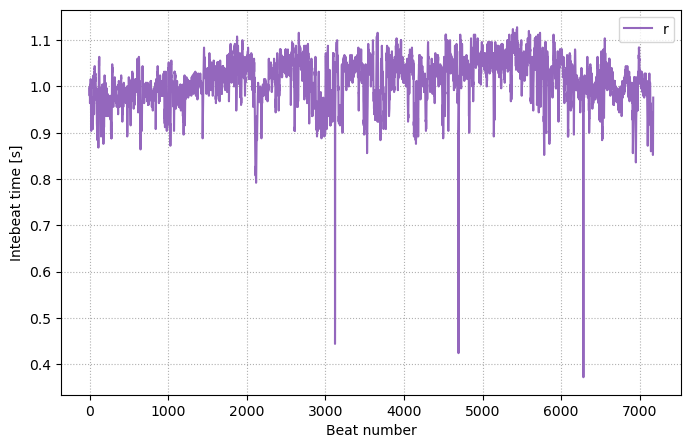

In [7]:
column=list(RR_intervals_original.columns)[0] #choose first patient
RR = pd.read_hdf('RR_intervals_original.hdf', key=key) # choose selected database

fig = plt.figure(figsize=(8,5))
plt.plot(RR[column]/(250 if database!='MIT' else 128), #because one db has 128 Hz sampling frequency
         color=colors[8], label='b(i)')
plt.grid(linestyle='dotted')
plt.xlabel('Beat number')
plt.ylabel('Intebeat time [s]')
plt.legend('right down')
#plt.savefig('b_Chfdb.png', bbox_inches='tight')
plt.show()

## Plots of signals
For all dataset 
<table><tr>
    <td><figure><img src="images/b_Fantasia.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.8 - Interbeat times for Fantasia dataset </figcaption>
</figure></td>
    <td><figure><img src="images/b_MIT.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.9 - Interbeat times for MIT dataset </figcaption>
</figure></td>
    <td><figure><img src="images/b_Chfdb.png" alt="fantasia" style="width:100%">
  <figcaption>Fig.10 - Interbeat times for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

## Clensing the dataframe from the Nan columns
Sometimes `processing.XQRS` is not able to properly locate peaks, returning `Nan` values. Annotations are loaded instead.

In [8]:
RR_intervals, files = clean_df(RR_intervals_original, database)

## Rejecting outliers
We clean RR intervals, redefining those that exceed the interval $\left[\overline{RR} - f\cdot\sigma, \overline{RR}+f\cdot\sigma\right]$ as $\overline{RR}$

In [9]:
factor=3 #rejection factor

for file in files:
    mean = RR_intervals[file].mean()
    std  = RR_intervals[file].std()
    RR_intervals.loc[(RR_intervals[file] > mean + factor*std) | ( RR_intervals[file]< mean - factor*std), file]=mean

# Constructing the cumulative functions from the interbeat time intervals

In [10]:
B=pd.DataFrame(np.cumsum(RR_intervals, axis=0))

In [11]:
# describe only the first 7 files
B.iloc[:, 0:7].describe()

,f1o01,f1o02,f1o03,f1o04,f1o05,f1o06,f1o07
count,7.171000e+03,6.822000e+03,7.228000e+03,6.243000e+03,5.734000e+03,6.230000e+03,7.149000e+03
mean,9.027390e+05,8.977785e+05,8.970521e+05,9.090362e+05,7.712857e+05,9.140689e+05,8.937041e+05
std,5.271829e+05,5.259816e+05,5.247960e+05,5.247688e+05,4.512111e+05,5.257675e+05,5.238034e+05
min,2.490000e+02,2.410000e+02,2.508641e+02,3.090000e+02,2.530000e+02,3.120000e+02,2.480000e+02
25%,4.440005e+05,4.397142e+05,4.400402e+05,4.534237e+05,3.786013e+05,4.592643e+05,4.386642e+05
50%,8.988845e+05,8.943477e+05,8.916156e+05,9.098094e+05,7.660805e+05,9.147192e+05,8.861597e+05
75%,1.360582e+06,1.355340e+06,1.350185e+06,1.366886e+06,1.161520e+06,1.370577e+06,1.347438e+06
max,1.814486e+06,1.811338e+06,1.813989e+06,1.813740e+06,1.559695e+06,1.821476e+06,1.812119e+06


# Computation of  $\Delta_s B(i)$

We compute the increments as:
$\Delta_s B(i) = \Big(B^{\ast}(i+s) - B^{\ast}(i) \Big)  / \sigma_s$.

Where $B^*(i)$ are the deviations from the polynonial fits over segments of lenght $2s$

```python
def increments(B_df, s_list, polydegree=3):
'''Inputs:
        B: Dataframe with the columns to be detrended
        s_list: List of value of s to be used to detrend B
        polydegree: Polynomial's degree used to detred the data
    return : List of array containing the detrended
             data increments for each column of B'''
    ...
    return list_DB
```

```python
nmax_seg=int(np.floor(B.size/(2*s))) #maximum number 
                                     #of possible segments with
                                     #increment s over B
if nmax_seg!= 0: #avoid useless computing power            
    for indx in range(nmax_seg):
        detrend.polynomial(B[indx*2*s: (indx+1)*2*s],
                           order=polydegree, plot=False) #for each
                                          #sliding segment, detrend
```            

```python
        # the whole B but now detrended
        detrended=B[0:2*s*nmax_seg]
        Delta_s_B_file=np.array([detrended[i+s]-detrended[i]
                                 for i in range(2*s*nmax_seg) 
                                 if i+s< len(detrended)])
        #normalized increments for each patient
        Delta_B_s.append(Delta_s_B_file/np.std(Delta_s_B_file))
```

In [12]:
def increments(B_df, s_list, polydegree=3):
    '''
    Inputs:
        B: Dataframe with the columns to be detrended
        s_list: List of value of s to be used to detrend B
        polydegree: Polynomial's degree used to detred the data
    
    Output:
        return : List of array containing the detrended data increments for each column of B
    
    '''
    fnames = list(B_df.columns) #columns name list
    list_DB=[]
    
    for s in s_list:
        Delta_B_s=[] #empy list containing all increments for a given s
        
        for B in B_df[fnames].values.T: #iterate on all lines like a wizard =)
            B = B[~np.isnan(B)] #removing all nan values from B
            nmax_seg=int(np.floor(B.size/(2*s))) #maximum number of possible segments with increment s over B
            if nmax_seg!= 0: #avoid useless computing power
                
                for indx in range(nmax_seg):
                    detrend.polynomial(B[indx*2*s: (indx+1)*2*s], order=polydegree, plot=False) # for each sliding segment, detrend

                # the whole B but now detrended
                detrended=B[0:2*s*nmax_seg]
                Delta_s_B_file=np.array([detrended[i+s]-detrended[i] for i in range(2*s*nmax_seg) if i+s< len(detrended)])
                Delta_B_s.append(Delta_s_B_file/np.std(Delta_s_B_file)) #normalized increments for each patient
        list_DB.append(np.concatenate(Delta_B_s))
    
    return list_DB

## Defining the values for $s$ and computing the increments

In [13]:
S=[2**i for i in range(3, 11)]
list_Delta_B= increments(B, S, polydegree=3)

# Fitting distributions

Following the steps of [Kiyono, 1](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.93.178103) we fit the Gaussian and Castaing's model to our datasets.

## Gaussian model
The gaussian model fit well the peak of the distribution of the $\Delta_s B(i)$, while it fails to fit the tails, as expected from theory. 

$$\mathcal{G}(x;\mu,\sigma, A)=\frac{A}{\sqrt{2\pi\sigma^2}}\exp{\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)}$$

In [14]:
def gaus(x, mu, sigma, A):
    return A/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x - mu)**2 / (2*sigma**2))

### Gaussian fit plotting code for selected database

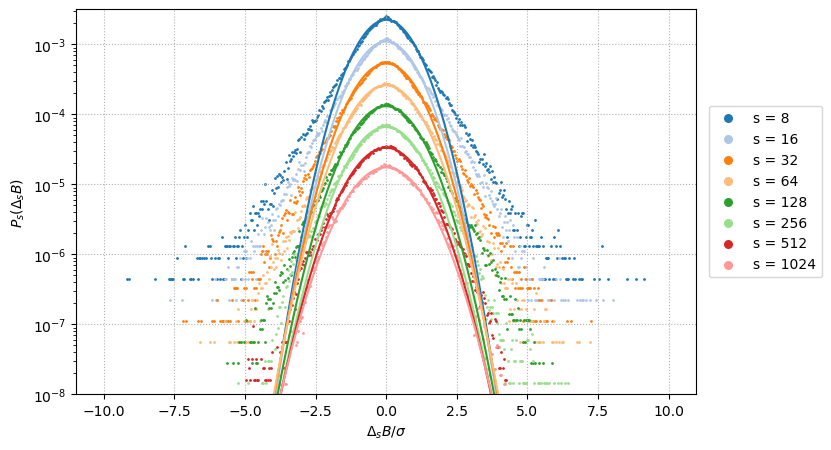

In [15]:
fig=plt.figure(figsize=(8,5))
for i, DBs in enumerate(list_Delta_B):
    counts, edges=np.histogram(DBs, bins=int(np.sqrt(DBs.size)), range=(-10, 10))
    bin_cen=(edges[1:]+edges[:-1])/2
        
    popt, pcov = curve_fit(gaus , bin_cen, counts/(S[i]*len(DBs)), p0=[1,1,1])
    
    x = np.linspace(-5, 5, 100)
    plt.plot(x, gaus(x, *popt), color=colors[i])
    
    plt.scatter(bin_cen, counts/(S[i]*len(DBs)), s=1, color=colors[i], label=f's = {S[i]}')

plt.yscale('log')
plt.ylim(1e-8, 10**(-2.5))
plt.ylabel(r'$P_s(\Delta_s B)$')
plt.xlabel(r'$\Delta_s B/\sigma$')
plt.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)
lgnd=plt.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)

#change the marker size manually for both lines
for legendHandles in lgnd.legendHandles:
    legendHandles._sizes = [30]

plt.grid(linestyle='dotted')
#plt.savefig(f'Gaussian_fit_{database}.png', bbox_inches='tight')
plt.show()

## Gaussian model plots

<table><tr>
    <td><figure><img src="images/Gaussian_fit_Fantasia.png" alt="fantasia" style="width:100%">
<figcaption>Fig.11 - Gaussian fit for Fantasia dataset </figcaption>
</figure></td>
</tr></table>

<table><tr>
    <td><figure><img src="images/Gaussian_fit_MIT.png" alt="fantasia" style="width:100%">
<figcaption>Fig.12 - Gaussian fit for MIT dataset </figcaption>
</figure></td>
</tr></table>

<table><tr>
    <td><figure><img src="images/Gaussian_fit_Chfdb.png" alt="fantasia" style="width:100%">
<figcaption>Fig.13 - Gaussian fit for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

## Castaing's model
We propose an alternative PDF for fitting the data, taken from [Castaing](https://www.sciencedirect.com/science/article/pii/016727899090035N) original work on velocities probabilities density functions on high Reynolds number turbolence.

$\sigma_0$ corresponds to the increments variance, $\lambda$ determines the distribution width

$$\Pi(u;\lambda,\sigma_0)=\frac{1}{2 \pi \lambda} \int_0^{+\infty} \exp \left(-\frac{u^2}{2 \sigma^2}\right) \exp \left(-\frac{\ln ^2\left(\sigma / \sigma_0\right)}{2 \lambda^2}\right) \frac{\mathrm{d} \sigma}{\sigma^2}$$

In [16]:
def castaing_integral(x, lambd, sigma_0):
    def little_cast(sigma, lambd, x, sigma_0):
        return 1/(2*np.pi*lambd*sigma**2)*np.exp(-(x**2/sigma**2 +
                                                   np.log(sigma/sigma_0)**2/lambd**2) / 2)
    result = quad(little_cast, 0, np.inf, args=(lambd, x, sigma_0))
    return result[0]

# scipy_integrate accepts only scalar functions, we can vectorize it this way
Castaing_integral = np.vectorize(castaing_integral)

### Castaing fit plotting code for selected database

8 (lamda, sigma0) 0.4165246041958329 0.8573838083738929
16 (lamda, sigma0) 0.41851313849115873 0.8780614401035263
32 (lamda, sigma0) 0.3752523061295022 0.9008598158324885
64 (lamda, sigma0) 0.319354179065047 0.9230075944637828
128 (lamda, sigma0) 0.3355333242197018 0.9237184183050939
256 (lamda, sigma0) 0.32931124340608386 0.9338292536761188
512 (lamda, sigma0) 0.26443282730652506 0.9535797395498244
1024 (lamda, sigma0) 0.23714255071834767 0.9853668656638211


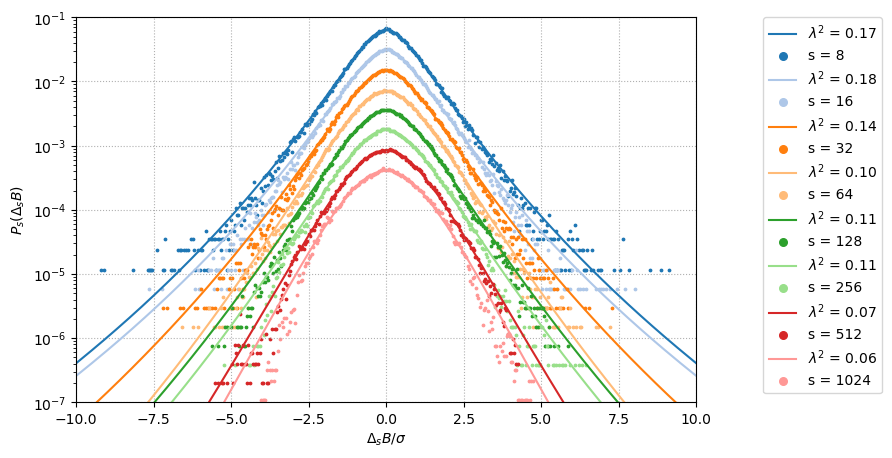

In [17]:
fig=plt.figure(figsize=(8,5))
for i,DBs in enumerate(list_Delta_B):
    counts, edges=np.histogram(DBs, bins=int(np.sqrt(DBs.size)), range=(-10, 10))
    bin_cen=(edges[1:]+edges[:-1])/2
    counts=counts/np.trapz(counts, bin_cen)
    
    popt, pcov = curve_fit(Castaing_integral, bin_cen, counts, p0=[np.sqrt(0.16), 1])
    
    x=np.linspace(-10, 10, 200)
    plt.plot(x, Castaing_integral(x, *popt)/S[i],  color=colors[i], label=r'$\lambda^2$ = {:.2f}'.format(*popt**2))
    print(S[i],'(lamda, sigma0)', *popt)

    plt.scatter(bin_cen, counts/S[i], s=3, label=f's = {S[i]}', color=colors[i])


plt.yscale('log')
plt.xlim(-10,10)
plt.ylim(1e-7, 1e-1)
plt.xlabel(r'$\Delta_s B/\sigma$')
plt.ylabel(r'$P_s(\Delta_s B)$')
lgnd = plt.legend(bbox_to_anchor=(1.3, 1), borderaxespad=0)
for legendHandles in lgnd.legendHandles:
    legendHandles._sizes = [30]
plt.grid(linestyle='dotted')
#plt.savefig(f'Castaing_fit_{database}.png', bbox_inches='tight')
plt.show()

## Castaing Model images

<table><tr>
    <td><figure><img src="images/Castaing_fit_Fantasia.png" alt="fantasia" style="width:100%">
<figcaption>Fig.14 - Castaing fit for Fantasia dataset </figcaption>
</figure></td></tr></table>

<table><tr>
    <td><figure><img src="images/Castaing_fit_MIT.png" alt="fantasia" style="width:100%">
<figcaption>Fig.15 - Castaing fit for MIT dataset </figcaption>
</figure></td></tr></table>

<table><tr>
<td><figure><img src="images/Castaing_fit_Chfdb.png" alt="fantasia" style="width:100%">
<figcaption>Fig.16 - Castaing fit for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

# Scale invariance

## Collapse plot of distributions
Plotting the different PDF on top of each other in order to verify scale invariance. The procedure differs from what done above since there is no vertical shift.

Chi squared Castaing 0.0004302040949691669
Chi squared Gauss 0.0020320542310015653


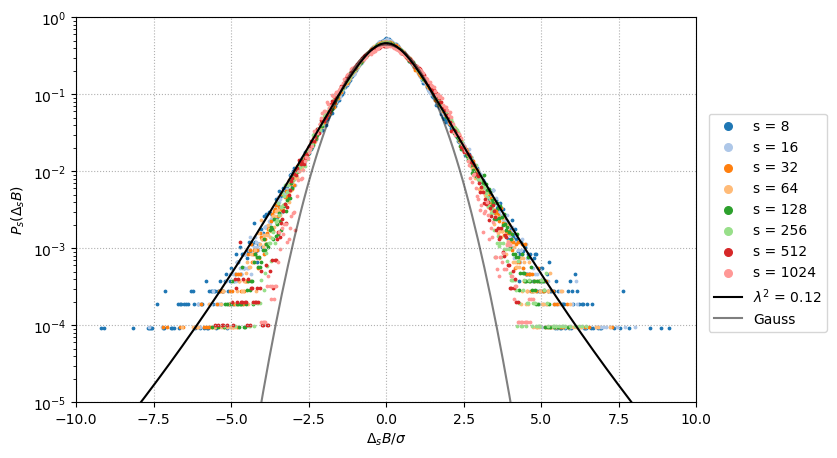

In [18]:
fig=plt.figure(figsize=(8,5))

for i,DBs in enumerate(list_Delta_B):
    counts, edges=np.histogram(DBs, bins=int(np.sqrt(DBs.size)), range=(-10, 10))
    bin_cen=(edges[1:]+edges[:-1])/2

    counts=counts/np.trapz(counts, bin_cen)

    plt.scatter(bin_cen, counts, s=3, label=f's = {S[i]}' , color=colors[i])

    mu, std=norm.fit(counts, fscale=1) # to imporove to properly fit data

# Computing the full dataset
complete_dataset=np.concatenate(list_Delta_B)

#Compute histogram, bin centers, and normalzation factor
x=np.linspace(-10, 10, 200)
counts_all, edges_all=np.histogram(complete_dataset, bins=int(np.sqrt(complete_dataset.size)), range=(-10, 10))
bin_cen_all=(edges_all[1:]+edges_all[:-1])/2
counts_all=counts_all/np.trapz(counts_all, bin_cen_all)

# Fitting curves to data
popt, pcov = curve_fit(Castaing_integral, bin_cen_all, counts_all, p0=[np.sqrt(0.16), 1])
plt.plot(x, Castaing_integral(x, *popt), label=r'$\lambda^2$ = {:.2f}'.format(*popt**2), color='black')

popt_g, pcov_g = curve_fit(gaus, bin_cen_all, counts_all, p0=[np.sqrt(0.16), 1, 1])
plt.plot(x, gaus(x, *popt_g), label='Gauss', color='black', alpha=0.5)

# Compute chisquared
chi_2=np.sum((counts_all[counts_all!=0]-Castaing_integral(bin_cen_all[counts_all!=0], *popt))**2/(counts_all[counts_all!=0]))/(counts_all[counts_all!=0].shape[0]-2)
chi_2_g=np.sum((counts_all[counts_all!=0]-gaus(bin_cen_all[counts_all!=0], *popt_g))**2/(counts_all[counts_all!=0]))/(counts_all[counts_all!=0].shape[0]-2)

print('Chi squared Castaing', chi_2)
print('Chi squared Gauss', chi_2_g)


plt.yscale('log')
plt.xlim(-10,10)
plt.ylim(1e-5, 1e0)
plt.xlabel(r'$\Delta_s B/\sigma$')
plt.ylabel(r'$P_s(\Delta_s B)$')
lgnd = plt.legend(bbox_to_anchor=(1.02, 0.75), loc='upper left', borderaxespad=0)

for legendHandles in lgnd.legendHandles:
    legendHandles._sizes = [30]
plt.grid(linestyle='dotted')
#plt.savefig(f'Collapse_plot_{database}.png', bbox_inches='tight')
plt.show()

## Collapse plot images

<table><tr>
    <td><figure><img src="images/Collapse_plot_Fantasia.png" alt="fantasia" style="width:100%">
<figcaption>Fig.17 - Collapse plot for Fantasia dataset </figcaption>
</figure></td>
</tr></table>
    

<table><tr>
<td><figure><img src="images/Collapse_plot_MIT.png" alt="fantasia" style="width:100%">
<figcaption>Fig.18 - Collapse plot for MIT dataset </figcaption>
</figure></td>
    </tr></table>
    

<table><tr>
    <td><figure><img src="images/Collapse_plot_Chfdb.png" alt="fantasia" style="width:100%">
<figcaption>Fig.19 - Collapse plot for Chfdb dataset </figcaption>
</figure></td>
</tr></table>

## Unhealthy individuals
As we can see from the collapsed plot of the Chfdb dataset, the unhealthy individuals heartbeat increments probability distributions show a robust scale invariance, just like the healthy ones. Therefore we argue that this fit does not help the diagnosis of any pathological rhythm as the same probability distribution of healthy individuals is followed.  

# Consistency check

## $\lambda^2$ dependence on $s$ parameter
[Li, 7](https://link.aps.org/doi/10.1103/PhysRevLett.86.1650) argues that within the turbulent cascade picture, that applies in this case, the parameter $\lambda^2$ can be interpreted as being proportional to the number of cascade steps and is known to decrease linearly with $\log s$. We find that there is a decreasing trend, even though of slight statistical importance.

This can be seen as a further proof of the robust scale invariance hypothesis.

## Different polynomial degree detrending
According to [Kiyono, 1](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.93.178103), there is a dependence of the fitting parameter $\lambda^2$ of Castaing's equation on the order of detrending polynomials.
To justify our choice of a third degree polynomial for detrending we plot the results for different polynomial degrees. We show that with the exception of second order polynomial fit the $\lambda^2$ vs. $s$ dependency is similar for all tested degrees. For this reason, the above analysis is conducted using a third degree polynomial detrend.

In [19]:
# code for denser s interval and fit order parameters
S_dens=[int(1.5**i) for i in range(4, 17)] #value of the scale parameter s considered
poly_degrees=[i for i in range(2, 6)] #value of the poly degree considered for detrending

> This cell is meant to be run only once. Its output is saved on `txt` files, to be later easily retrieved
```python
lambda_per_degree=[] #fit results for a given polynomial degree
lambda_list=[] #list of lists containing all the data for the final plot

err_lambda_per_degree=[] #errors on fit results for a given polynomial degree
err_lambda_list=[] #list of lists containing all the errors on the fit parameters

#loop on different scale and polynomial degree and calculation
for degree in poly_degrees:
    print('Degree:', degree)

    lambda_per_degree=[] #fit results for a given polynomial degree
    err_lambda_per_degree=[] #errors on fit results for a given polynomial degree

    Delta_s_B_degree= increments(B, S_dens, polydegree=degree)

    for DBs in Delta_s_B_degree:

        counts, edges=np.histogram(DBs, bins=int(np.sqrt(DBs.size)), range=(-10, 10))
        bin_cen=(edges[1:]+edges[:-1])/2
        counts=counts/np.trapz(counts, bin_cen)   

        popt, pcov = curve_fit(Castaing_integral, bin_cen, counts, p0=[np.sqrt(0.16), 1])

        lambda_per_degree.append(popt[0])
        err_lambda_per_degree.append(np.sqrt(pcov[0,0]))

    lambda_list.append(lambda_per_degree)
    err_lambda_list.append(err_lambda_per_degree)

lambda_list=np.array(lambda_list)
err_lambda_list=np.array(err_lambda_list)

#print of the results in the files
filename1=f'lambda_fit_{database}.txt'
filename2=f'lambda_fit_error_{database}.txt'

np.savetxt(filename1, lambda_list)
np.savetxt(filename2, err_lambda_list)
```

In [20]:
#read data from txt files
filename1=f'lambda_fit_{database}.txt'
filename2=f'lambda_fit_error_{database}.txt'

lambda_list=np.loadtxt(filename1)
err_lambda_list=np.loadtxt(filename2)

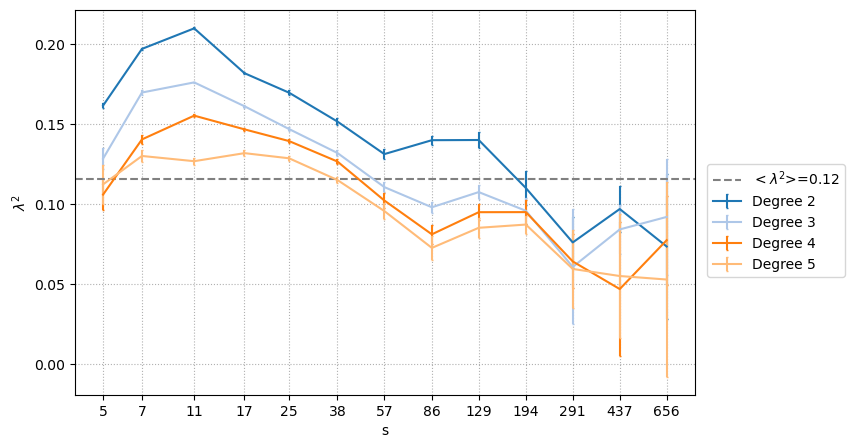

In [21]:
fig, ax = plt.subplots(1,1, figsize=(8,5))
lambda_square=lambda_list**2 #calculation of lambda^2
err_lambda_square=(2*err_lambda_list/lambda_square)**2 #propagation of the error on lambda^2
mean_lambda_squared = np.mean(lambda_square)

for i in range(0,len(poly_degrees)):
    ax.errorbar(S_dens, lambda_square[i,:], err_lambda_square[i,:], label='Degree {}'.format(poly_degrees[i]), capsize=1, color=colors[i])

ax.axhline(y=mean_lambda_squared, linestyle='dashed', color='grey', label = fr'$<\lambda^2$>={mean_lambda_squared:.2f}' )
ax.legend(bbox_to_anchor=(1.02, 0.60), loc='upper left', borderaxespad=0)
ax.grid(linestyle='dotted')
ax.set_xscale('log', subs=[])
ax.set_xlabel('s')
ax.set_ylabel('$\lambda^2$')
ax.tick_params(axis='x', which='minor', bottom=False,top=False, labelbottom=False)
ax.xaxis.set_ticks(S_dens)
ax.set_xticklabels(labels=S_dens)
ax.set_xticks(S_dens)
#plt.savefig(f'lambda_square_{database}.png', bbox_inches='tight')
plt.show()

# $\lambda^2$ vs. $s$ plots

<table><tr>
    <td><figure><img src="images/lambda_square_Fantasia.png" alt="fantasia">
<figcaption>Fig.20 - $\lambda^2$ as function of s for Fantasia </figcaption>
</figure></td>
    </tr></table>

<table><tr>
    <td><figure><img src="images/lambda_square_MIT.png" alt="fantasia">
<figcaption>Fig.21 - $\lambda^2$ as function of s for MIT </figcaption>
</figure></td>
</tr></table>

<table><tr>
    <td><figure><img src="images/lambda_square_Chfdb.png" alt="fantasia" >
<figcaption>Fig.22 - $\lambda^2$ as function of s for Chfdb </figcaption>
</figure></td>
</tr></table>

# Conclusions
We **successfully verified the robust scale invariance hypothesis** on interbeat time series of healty hearts.

We included in the analysis some records from **unhelathy patients** and showed they follow again, the same distribution.

Checking the fluctuations of $\lambda^2$ over a wide range of $s$ time scales, we highlight once again the consistency of the initial hypothesis. 

# Bibliography

- [1](https://link.aps.org/doi/10.1103/PhysRevLett.93.178103) **Critical Scale Invariance in a Healthy Human Heart Rate**, Kiyono et al., Physical Review Letters, Vol. 93, Iss. 17 — 22 October 2004
- [2](https://doi.org/10.1016/0167-2789(90)90035-N) **Velocity probability density functions of high Reynolds number turbulence**, B. Castaing et al., Physica D: Nonlinear Phenomena, Volume 46, Issue 2, 1990
- [3](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1343) **Long-range anticorrelations and non-Gaussian behavior of the heartbeat**, C.-K. Peng, J. Mietus, J. M. Hausdorff, S. Havlin, H. E. Stanley, and A. L. Goldberger
Phys. Rev. Lett. 70, 1343
- [4](https://doi.org/10.1038/20924) **Multifractality in human heartbeat dynamics**, Ivanov, P., Amaral, L., Goldberger, A. et al., Nature 399, 461–465 (1999)
- [5](https://doi.org/10.1161/01.CIR.93.12.2142) **Power law behavior of RR-interval variability in healthy middle-aged persons, patients with recent acute myocardial infarction, and patients with heart transplants**, Bigger Jr, J. Thomas, et al., Circulation 93.12 (1996): 2142-2151.
- [6](https://doi.org/10.1016/S0378-4371(99)00499-9) **Dynamic phase transition observed in the Internet traffic flow**, Misako Takayasu, et al., Physica A: Statistical Mechanics and its Applications, Volume 277, Issues 1–2, (2000)
- [7](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.86.1650) **Modeling Heart Rate Variability in Healthy Humans: A Turbulence Analogy**, D. C. Lin and R. L. Hughson, Phys. Rev. Lett. 86, 1650 (2001).